In [4]:
from src import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Snippet to fit a model on a graph generated on the fly.

First, we generate a graph and the accompanying choice sets. In this case, we set $p=0.25$.

In [2]:
# generate a growing graph
(G, el) = network_generation.generate_mixed_model('test', n_max=20000, r=1.00, p=0.25, grow=True, m=4, vvv=1)
# compute choice sets
D = network_stats.choice_data('test', el, n_alt=8, vvv=1)

[test] generated a growing graph with 5004 nodes and 20001 edges (r=1.00, p=0.25)
[test] final graph has 5004 nodes and 20001 edges


Then, we try fitting a few different models.

## 1) Log Logit

In [3]:
# fit single log model
m1 = logit_individual.LogDegreeModel('test', D=D, vvv=2)
m1.fit()

[test] fitting with BFGS
[test] i=  0 ll=43945.18286
[test] parameters after fitting: [0.27484116]


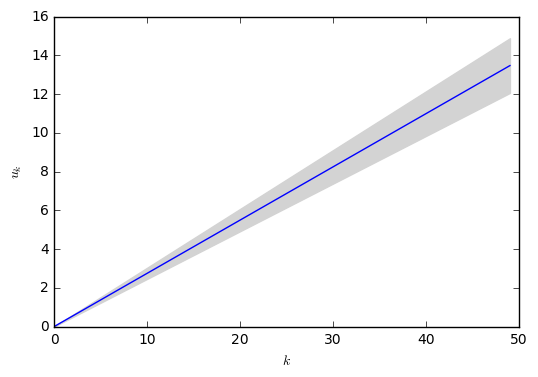

In [4]:
plt.figure()
xs = np.arange(50)
plt.fill_between(xs, xs * (m1.u - 1.96*m1.se), xs * (m1.u + 1.96*m1.se), color='lightgrey')
plt.plot(xs, xs * m1.u, '-b')
plt.xlabel(r"$k$")
plt.ylabel(r"$u_k$")

## 2) Degree Logit

In [5]:
# fit degree logit model
m2 = logit_individual.DegreeModel('test', D=D, vvv=2)
m2.fit()

[test] fitting with BFGS
[test] i=  0 ll=43826.10979
[test] i= 10 ll=43747.39013
[test] i= 20 ll=43738.43618
[test] i= 30 ll=43735.67776
[test] i= 40 ll=43735.47966
[test] i= 50 ll=43735.47943
[test] parameters after fitting: [1.         1.         0.41777652 1.88243385 0.45835985 0.50658657
 0.57074214 0.5688036  0.5960852  0.63282388 0.71623971 0.76042918
 0.73808792 0.76630077 0.77537738 0.93305778 0.88046373 0.81319014
 0.74974491 0.89872139 0.8613798  0.77208867 0.83499446 1.22390291
 0.76401985 1.30692439 1.0351824  1.1874997  0.92805813 1.11494596
 0.92813494 1.04220454 0.76654822 1.0155955  1.21814357 0.87148026
 1.36700307 1.04008241 0.89514831 1.41898992 1.29378986 0.68221412
 1.1846201  1.34665235 1.53580002 1.84975223 0.28011505 2.00750871
 1.30288824 1.30253973 1.95656809]


(0, 6)

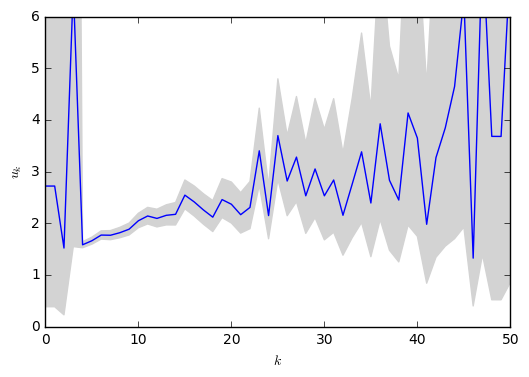

In [11]:
plt.figure()
xs = np.arange(51)
plt.fill_between(xs, np.exp(m2.u - 1.96*m2.se), np.exp(m2.u + 1.96*m2.se), color='lightgrey')
plt.plot(xs, np.exp(m2.u), '-b')
plt.xlabel(r"$k$")
plt.ylabel(r"$u_k$")
axes = plt.gca()
axes.set_ylim([0, 6])

The fit isn't great as there isn't much data in the higher degree region.

## 3) Mixed Logit

In [7]:
# fit mixed logit model
m3 = logit.MixedLogitModel('test', grouped=False, D=D, vvv=1)
m3.add_log_degree_model()
m3.add_uniform_degree_model()
T3 = m3.fit(etol=0.025, n_rounds=50, return_stats=True)

[test] [  0/ 50] (ld) pi_1=0.486 u_1=0.76 ll_1=20695.71 (ud) pi_2=0.514 u_2=1.00 ll_2=22570.85 (*) tot_ll=43266.5613
[test] [ 10/ 50] (ld) pi_1=0.478 u_1=0.56 ll_1=20638.39 (ud) pi_2=0.522 u_2=1.00 ll_2=22940.33 (*) tot_ll=43578.7217
[test] delta in ll (0.000) < etol (0.025), stopping
[test] u's  = [(ld:0.560), (ud:1.000)]
[test] pi's = [(ld:0.478), (ud:0.522)]


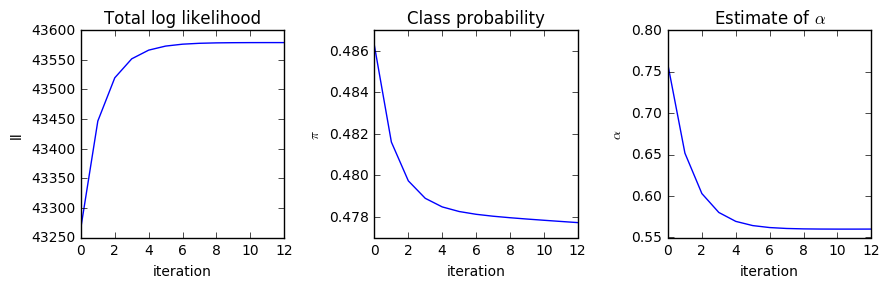

In [8]:
plt.figure(figsize=(9,3))

plt.subplot(131)
T3.tot_ll.plot()
plt.title('Total log likelihood')
plt.xlabel("iteration")
plt.ylabel("ll")

plt.subplot(132)
T3.p1.plot()
plt.title('Class probability')
plt.xlabel("iteration")
plt.ylabel(r"$\pi$")

plt.subplot(133)
T3.u1.plot()
plt.title(r'Estimate of $\alpha$')
plt.xlabel("iteration")
plt.ylabel(r"$\alpha$")

plt.tight_layout()

* It converges quite quickly with respect to total log likelihood.
* The class probability doesn't change at all, and stays at 0.48.
* The estimate for $\alpha$ stops at 0.6.

## 3b) Mixed Logit with clamped coefficients

Here, we 'clamp' the $\alpha$ coefficient. We set it to 1 (pure PA) and do not update it in between iterations of EM. All that changes is the class probabilities.

In [9]:
# fit mixed logit model
m3b = logit.MixedLogitModel('test', grouped=False, D=D, vvv=1)
m3b.add_log_degree_model(bounds=((1, 1),))  # clamped at 1 (full PA)
m3b.add_uniform_degree_model()
T3b = m3b.fit(etol=0.025, n_rounds=200, return_stats=True)

[test] [  0/200] (ld) pi_1=0.486 u_1=1.00 ll_1=20766.01 (ud) pi_2=0.514 u_2=1.00 ll_2=22570.85 (*) tot_ll=43336.8627
[test] [ 10/200] (ld) pi_1=0.386 u_1=1.00 ll_1=16273.90 (ud) pi_2=0.614 u_2=1.00 ll_2=26991.46 (*) tot_ll=43265.3623
[test] [ 20/200] (ld) pi_1=0.331 u_1=1.00 ll_1=13873.87 (ud) pi_2=0.669 u_2=1.00 ll_2=29391.85 (*) tot_ll=43265.7209
[test] [ 30/200] (ld) pi_1=0.301 u_1=1.00 ll_1=12549.24 (ud) pi_2=0.699 u_2=1.00 ll_2=30729.10 (*) tot_ll=43278.3414
[test] [ 40/200] (ld) pi_1=0.283 u_1=1.00 ll_1=11788.28 (ud) pi_2=0.717 u_2=1.00 ll_2=31501.50 (*) tot_ll=43289.7751
[test] [ 50/200] (ld) pi_1=0.273 u_1=1.00 ll_1=11337.69 (ud) pi_2=0.727 u_2=1.00 ll_2=31960.33 (*) tot_ll=43298.0241
[test] [ 60/200] (ld) pi_1=0.266 u_1=1.00 ll_1=11065.38 (ud) pi_2=0.734 u_2=1.00 ll_2=32238.17 (*) tot_ll=43303.5514
[test] [ 70/200] (ld) pi_1=0.262 u_1=1.00 ll_1=10898.62 (ud) pi_2=0.738 u_2=1.00 ll_2=32408.52 (*) tot_ll=43307.1400
[test] [ 80/200] (ld) pi_1=0.260 u_1=1.00 ll_1=10795.63 (ud) pi_

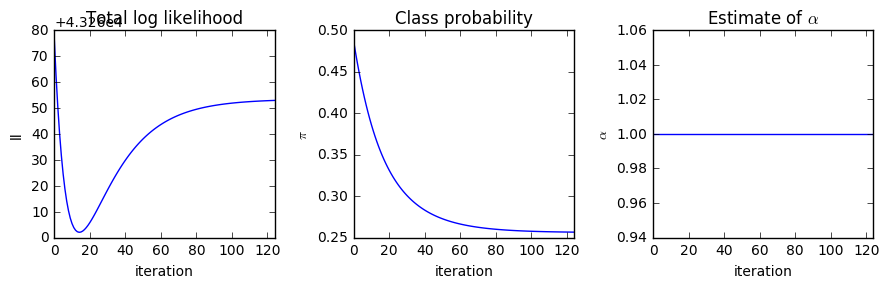

In [10]:
plt.figure(figsize=(9,3))

plt.subplot(131)
T3b.tot_ll.plot()
plt.title('Total log likelihood')
plt.xlabel("iteration")
plt.ylabel("ll")

plt.subplot(132)
T3b.p1.plot()
plt.title('Class probability')
plt.xlabel("iteration")
plt.ylabel(r"$\pi$")

plt.subplot(133)
T3b.u1.plot()
plt.title(r'Estimate of $\alpha$')
plt.xlabel("iteration")
plt.ylabel(r"$\alpha$")

plt.tight_layout()

* The log likelihood is non-monotonic in the first 15 rounds, but then converges (albeit very slowly).
* The class probability converges to 0.277, which is slightly biased, but better than the Log Logit estimate of 0.289.
* $\alpha$ is clamped at 1, so it doesn't change.

Here is an example of how computing the LL manually for specific values of $u$ and $\pi$.

In [12]:
# fit mixed logit model
m3c = logit.MixedLogitModel('test', grouped=False, D=D, vvv=1)
m3c.add_log_degree_model(bounds=((1, 1),))
m3c.add_uniform_degree_model()
# evaluate LL for u = 1 and alpha = 0.25
m3c.ll_pi({0: [1], 1: [1]}, {0: 0.25, 1: 0.75})

43384.80093832372